# Cross Spectral Density Estimator Test


In [30]:
using PyPlot

include("../AnalysisToolbox.jl")

ARMA_gen (generic function with 3 methods)

# White Noise

In [4]:
steps = 10^7
W = randn(1,steps)

1×10000000 Array{Float64,2}:
 -1.18938  -0.964492  -0.0629507  0.902476  …  0.131262  -0.129605  -0.975294

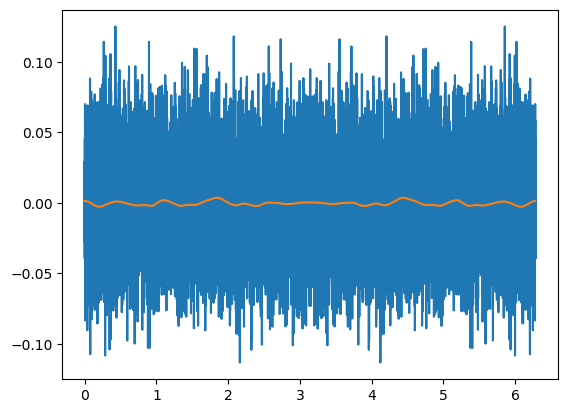

sum of μ: 1.0


C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000020D563E88>

In [43]:
L    = 5000
Nex  = 10000
win  = "Par"

nfft = 0
n    = 2
p    = 500
ty   = "bin"


spect_D  = z_crossspect_fft_old(W,W;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(W, W;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

spect_ana(θ) = 1

plot(F_SP,spect_SP[1,1,:] - spect_ana.(F_SP),label = "Smoother Periodogram")
plot(F_D,spect_D[1,1,:] - spect_ana.(F_D),label = "Direct Estimator")


In [44]:
mean(spect_D[1,1,:] - spect_ana.(F_D))

-0.0003916851566433356 - 3.830795030007736e-33im

In [45]:
lam = _window(50)

101-element Array{Float64,1}:
 -9.818186930595453e-91
  1.6000000000000003e-5
  0.00012800000000000002
  0.000432
  0.0010240000000000002
  0.0020000000000000005
  0.003456
  0.0054880000000000016
  0.008192000000000001
  0.011663999999999999
  0.016000000000000004
  0.021296
  0.027648
  ⋮
  0.021296
  0.016000000000000004
  0.011663999999999999
  0.008192000000000001
  0.0054880000000000016
  0.003456
  0.0020000000000000005
  0.0010240000000000002
  0.000432
  0.00012800000000000002
  1.6000000000000003e-5
 -9.818186930595453e-91

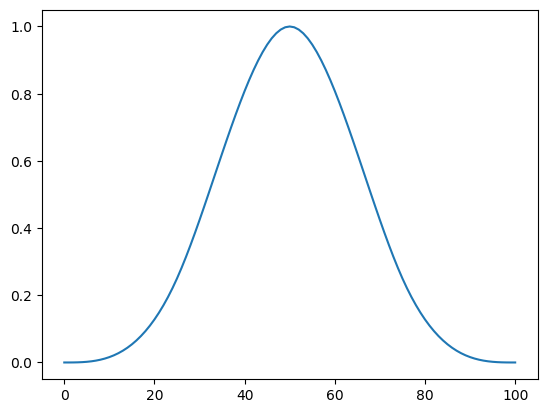

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000020D5ED948>

In [47]:
plot(lam)

In [50]:
lam_hat = fft(ifftshift(lam))

101-element Array{Complex{Float64},1}:
                  37.5 + 0.0im
     24.84751623632062 + 1.8735013540549517e-16im
     6.406595413407828 - 2.693015096564839e-16im
    0.3467431943530007 + 1.0438753026650752e-16im
 3.7476021855772725e-7 - 4.041663564169677e-17im
   0.03489656142776814 + 3.2388111498186985e-16im
   0.07879031101595979 - 2.2854641750337557e-15im
  0.013125576251866389 - 2.767213549357206e-16im
  3.740673993246537e-7 + 3.434463228079773e-16im
  0.002893858489279616 - 1.1106826006046643e-16im
   0.01013441201611931 - 3.7457268808025823e-16im
 0.0023989800389229263 + 9.446354522169708e-16im
 3.7301200772610343e-7 - 2.452558523972698e-16im
                       ⋮
 3.7301200772610343e-7 - 2.452558523972698e-16im
 0.0023989800389229263 + 9.446354522169708e-16im
   0.01013441201611931 - 3.7457268808025823e-16im
  0.002893858489279616 - 1.1106826006046643e-16im
  3.740673993246537e-7 + 3.434463228079773e-16im
  0.013125576251866389 - 2.767213549357206e-16im
   0.0787903110

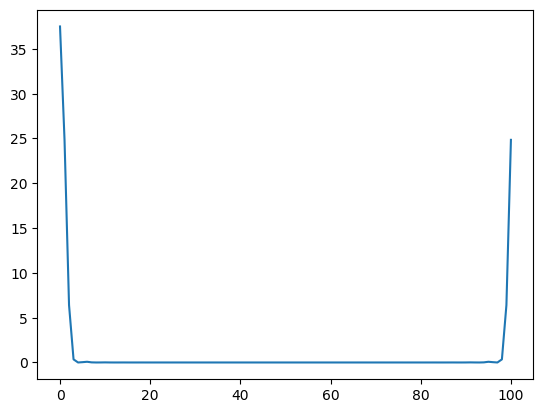

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000020E6D0188>

In [51]:
plot(real(lam_hat))

## ARMA(p,q)

In [40]:
Poles = [.9]
w = [2, .5,6 ]
steps = 10^6

if Poles != []
    p = length(Poles)
    P = prod([Polynomial([1]); [Polynomial([1,-z]) for z in Poles]])
    # Produces a poly with roots: Poles.^(-1)
    l = coeffs(P);
end

Q = Polynomial(w)

spect_ana(θ) = (Q(exp(-im*θ))*Q(exp(-im*θ))')/(P(exp(-im*θ))*P(exp(-im*θ))')

X = ARMA_gen(;w,Poles,steps);
X = reshape(X,1,:)

1×1000000 Array{Complex{Float64},2}:
 -12.636+0.0im  -17.9095+0.0im  …  1.65368+0.0im  2.30877+0.0im

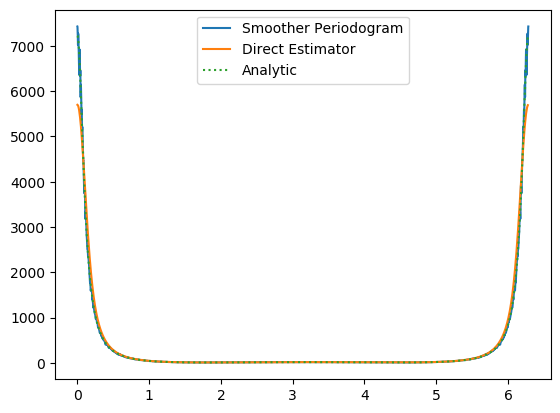

sum of μ: 1.0


C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x000000006B955C88>

In [41]:
L    = 50
Nex  = 2^10
win  = "Par"

nfft = 0
n    = 2
p    = 500
ty   = "bin"


spect_D  = z_crossspect_fft_old(X,X;
    L, Nex, win);
F_D = 2π*(0:Nex-1)/Nex

spect_SP = z_crossspect_fft(X, X;
    nfft, n, p, ty) ;
N = size(spect_SP,3)
F_SP = 2π*(0:N-1)/N;

μ = _smoother(n,p;ty)
println("sum of μ: ",sum(μ))

plot(F_SP,spect_SP[1,1,:],label = "Smoother Periodogram")
plot(F_D,spect_D[1,1,:],label = "Direct Estimator")
plot(F_SP,spect_ana.(F_SP),":",label = "Analytic")
legend()

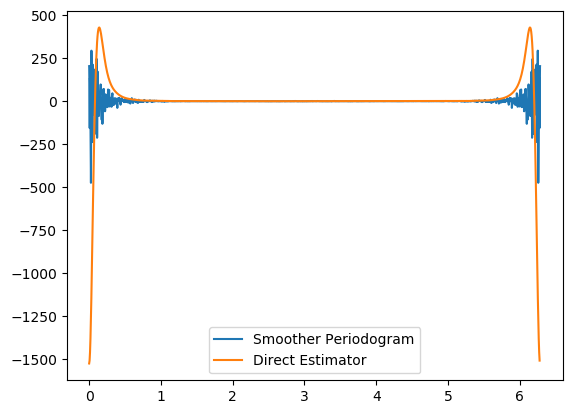

C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\JaredMcBride\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


PyObject <matplotlib.legend.Legend object at 0x0000000063CF8C48>

In [42]:
plot(F_SP,spect_SP[1,1,:] - spect_ana.(F_SP),label = "Smoother Periodogram")
plot(F_D,spect_D[1,1,:] - spect_ana.(F_D),label = "Direct Estimator")
legend()